<h2><b>Clustering ( Unsupervised Learning )</b></h2>

<h4>In this the data is Grouped ,based on Similarity and Difference</h4>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib,os

In [49]:
df = pd.read_csv("farmer.csv")
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [86]:
df[df['label']=='pigeonpeas']

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_no
400,3,72,24,36.512684,57.928872,6.031608,122.653969,pigeonpeas,6
401,40,59,23,36.891637,62.731782,5.269085,163.726655,pigeonpeas,6
402,33,73,23,29.235405,59.389676,5.985793,103.330180,pigeonpeas,6
403,27,57,24,27.335349,43.357960,6.091863,142.330368,pigeonpeas,6
404,10,79,18,21.064368,55.469859,5.624731,184.622671,pigeonpeas,6
...,...,...,...,...,...,...,...,...,...
495,35,71,17,29.892866,66.353751,6.931925,198.140300,pigeonpeas,0
496,11,72,22,29.377356,44.822946,6.842744,172.401680,pigeonpeas,6
497,20,60,22,29.650529,42.898332,6.876573,186.922605,pigeonpeas,6
498,10,71,18,19.542849,66.347773,6.151029,173.110698,pigeonpeas,7


In [50]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [51]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [52]:
group = df.groupby('label')

group[['K']].mean()

,K
label,
apple,199.89
banana,50.05
blackgram,19.24
chickpea,79.92
coconut,30.59
coffee,29.94
cotton,19.56
grapes,200.11
jute,39.99


In [53]:
nitrogen = group['N'].agg(min_nitro='min',max_nitro='max',avg_nitro='mean')

In [54]:
nitrogen.reset_index(inplace=True)

In [55]:
nitrogen

,label,min_nitro,max_nitro,avg_nitro
0,apple,0,40,20.80
1,banana,80,120,100.23
2,blackgram,20,60,40.02
3,chickpea,20,60,40.09
4,coconut,0,40,21.98
5,coffee,80,120,101.20
6,cotton,100,140,117.77
7,grapes,0,40,23.18
8,jute,60,100,78.40
9,kidneybeans,0,40,20.75


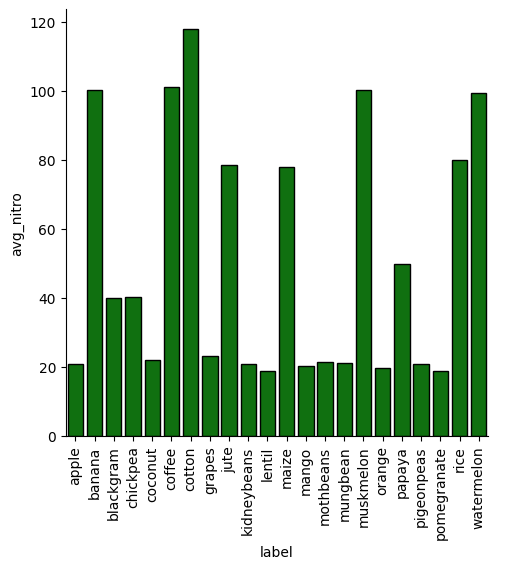

In [56]:
sns.catplot(x='label',y='avg_nitro',data=nitrogen,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

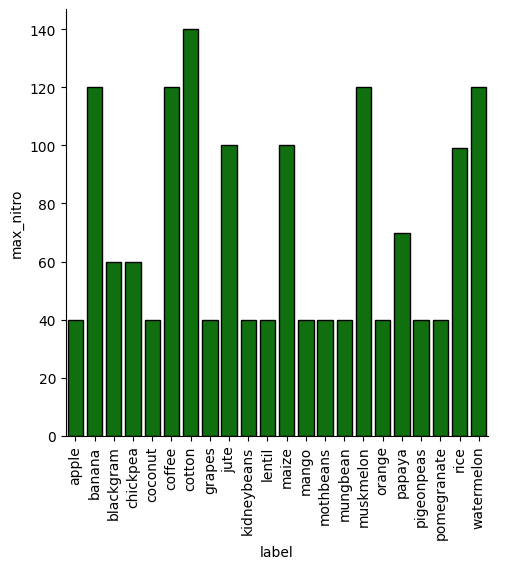

In [57]:
sns.catplot(x='label',y='max_nitro',data=nitrogen,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

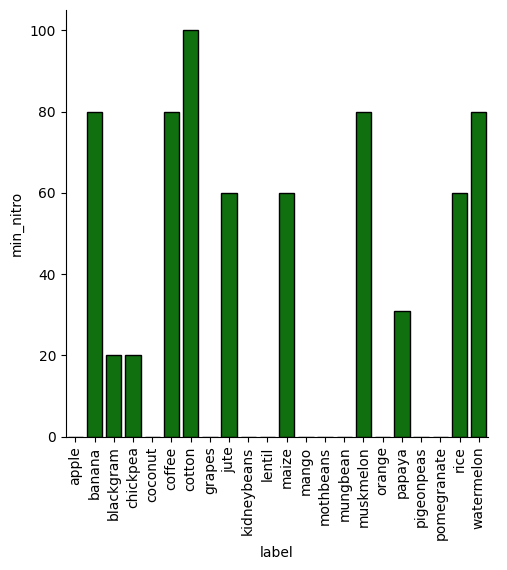

In [58]:
sns.catplot(x='label',y='min_nitro',data=nitrogen,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

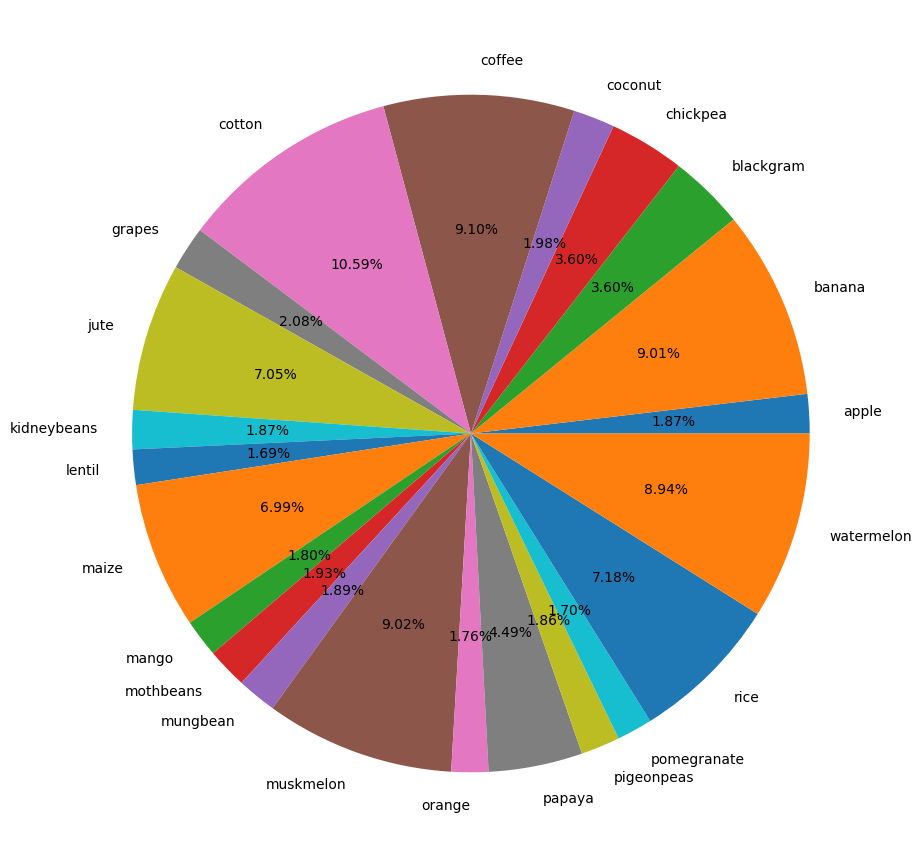

In [59]:
plt.figure(figsize=(11,11))
crops_label = list(nitrogen['label'])
avg_nitrogen = list(nitrogen['avg_nitro'])
plt.pie(avg_nitrogen,labels=crops_label,autopct='%2.2f%%')
plt.show()

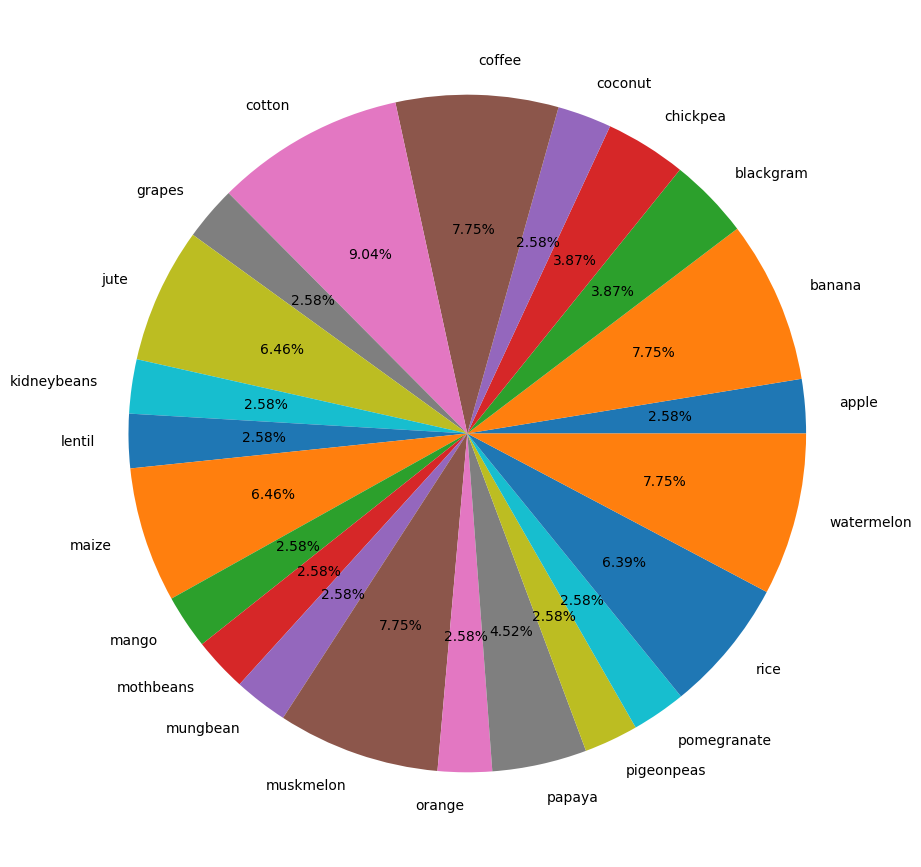

In [60]:
plt.figure(figsize=(11,11))
crops_label = list(nitrogen['label'])
max_nitrogen = list(nitrogen['max_nitro'])
plt.pie(max_nitrogen,labels=crops_label,autopct='%2.2f%%')
plt.show()

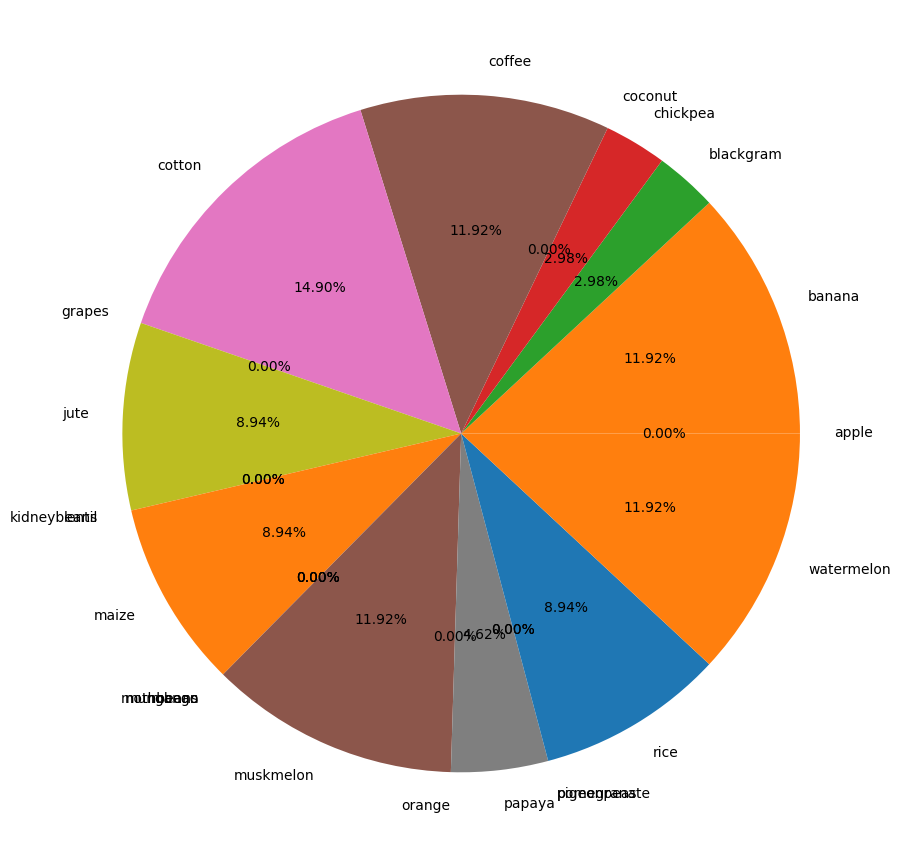

In [61]:
plt.figure(figsize=(11,11))
crops_label = list(nitrogen['label'])
min_nitrogen = list(nitrogen['min_nitro'])
plt.pie(min_nitrogen,labels=crops_label,autopct='%2.2f%%')
plt.show()

In [62]:
temp = group['temperature'].agg(min_temp='min',max_temp='max',avg_temp='mean')
temp.reset_index(inplace=True)

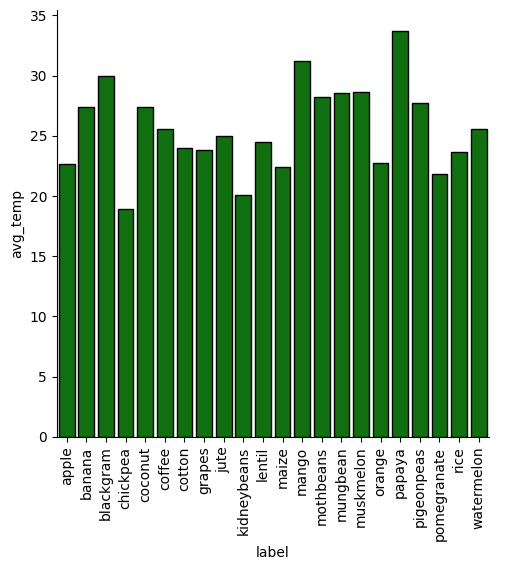

In [63]:
sns.catplot(x='label',y='avg_temp',data=temp,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

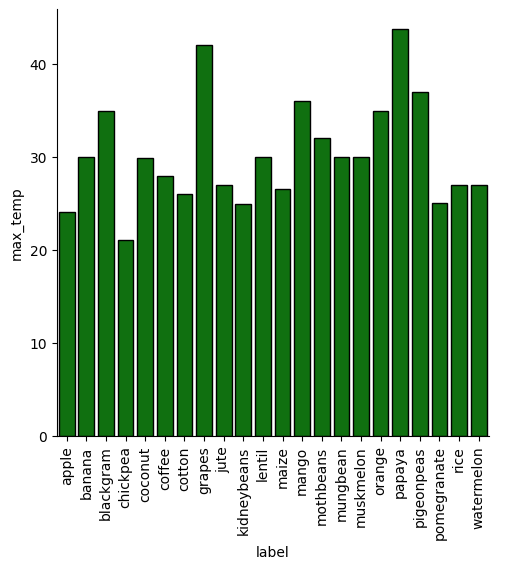

In [64]:
sns.catplot(x='label',y='max_temp',data=temp,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

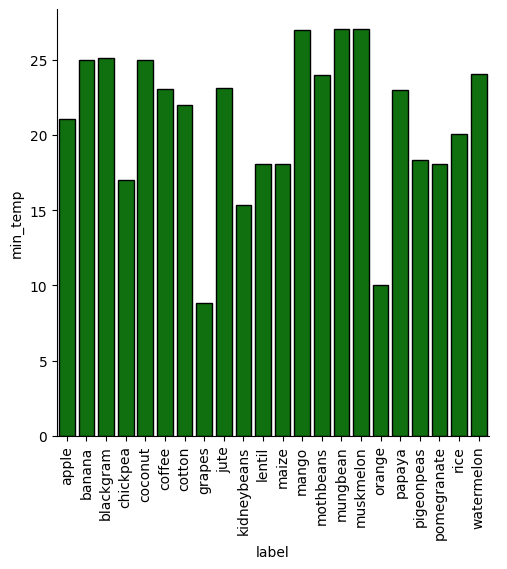

In [65]:
sns.catplot(x='label',y='min_temp',data=temp,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

In [66]:
rain = group['rainfall'].agg(min_rain='min',max_rain='max',avg_rain='mean')
rain.reset_index(inplace=True)

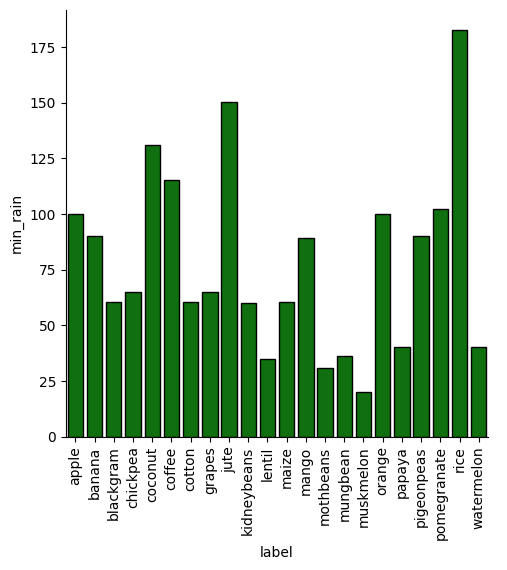

In [67]:
sns.catplot(x='label',y='min_rain',data=rain,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

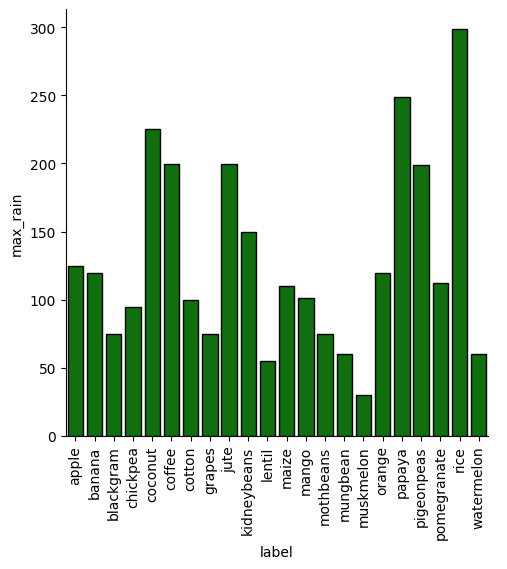

In [68]:
sns.catplot(x='label',y='max_rain',data=rain,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

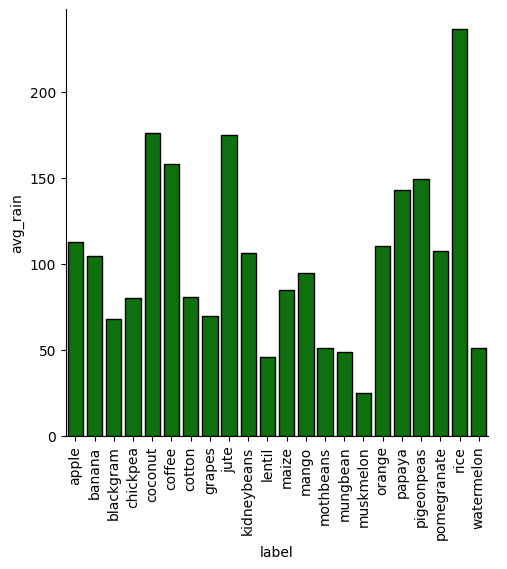

In [69]:
sns.catplot(x='label',y='avg_rain',data=rain,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

In [70]:
x = df.drop('label',axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


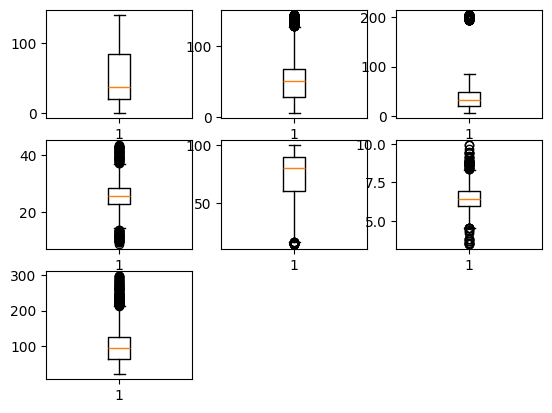

In [71]:
i = 1
for col in x.columns:
    plt.subplot(3,3,i)
    plt.boxplot(x[col])
    i+=1
plt.show()

In [72]:
# KMeansAlg ==> better accuracy --> normalize data

from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler

std = StandardScaler()

x_transformed = std.fit_transform(x)

In [73]:
x_transformed

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [74]:
from sklearn.cluster import KMeans

# KMeans()
# Euclidian Distance Method

kmeans = KMeans() # default number clusters are 8 

kmeans.fit(x_transformed)

KMeans()

In [75]:
kmeans.labels_

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [76]:
df['cluster_no'] = kmeans.labels_

In [85]:
group_seven = df[df['cluster_no'] == 1
                 
                 ]
group_seven['label'].unique()

array(['pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil',
       'mango', 'orange', 'papaya'], dtype=object)

In [78]:
os.makedirs('models',exist_ok=True)
joblib.dump(kmeans,"models/kmeans_model.lb")
joblib.dump(std,"models/standardscaler.lb")

['models/standardscaler.lb']

In [79]:
from sklearn.metrics import silhouette_score
# ranges from -1 to 1

silhouette_score(x_transformed,kmeans.labels_)

# Hirarchichal
# DBSCAN
# WCSS
# Elbow Method

np.float64(0.29817371236537776)

In [80]:
df[['label','cluster_no']].to_csv('./models/filtering_data.csv',index=False)

In [81]:
df[df['cluster_no']==0]

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0
...,...,...,...,...,...,...,...,...,...
2126,86,26,27,27.131404,52.893683,6.081173,192.428038,coffee,0
2134,86,31,35,27.012073,60.766453,6.485761,191.450893,coffee,0
2144,87,23,28,26.223674,62.265946,6.979591,193.746197,coffee,0
2146,98,29,30,25.640044,61.032735,6.217974,199.473564,coffee,0
